In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-mnist/AbdomenCT/003646.jpeg
/kaggle/input/medical-mnist/AbdomenCT/003998.jpeg
/kaggle/input/medical-mnist/AbdomenCT/001273.jpeg
/kaggle/input/medical-mnist/AbdomenCT/001609.jpeg
/kaggle/input/medical-mnist/AbdomenCT/007646.jpeg
/kaggle/input/medical-mnist/AbdomenCT/002415.jpeg
/kaggle/input/medical-mnist/AbdomenCT/003732.jpeg
/kaggle/input/medical-mnist/AbdomenCT/002082.jpeg
/kaggle/input/medical-mnist/AbdomenCT/001430.jpeg
/kaggle/input/medical-mnist/AbdomenCT/007265.jpeg
/kaggle/input/medical-mnist/AbdomenCT/008476.jpeg
/kaggle/input/medical-mnist/AbdomenCT/005745.jpeg
/kaggle/input/medical-mnist/AbdomenCT/007326.jpeg
/kaggle/input/medical-mnist/AbdomenCT/008356.jpeg
/kaggle/input/medical-mnist/AbdomenCT/000971.jpeg
/kaggle/input/medical-mnist/AbdomenCT/000631.jpeg
/kaggle/input/medical-mnist/AbdomenCT/008560.jpeg
/kaggle/input/medical-mnist/AbdomenCT/003601.jpeg
/kaggle/input/medical-mnist/AbdomenCT/003509.jpeg
/kaggle/input/medical-mnist/AbdomenCT/008940.jpeg


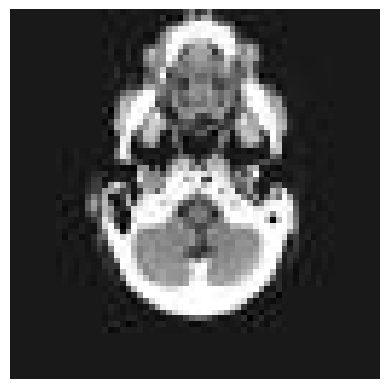

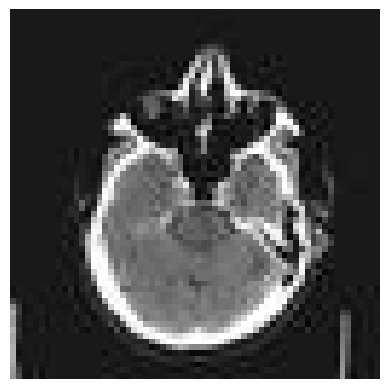

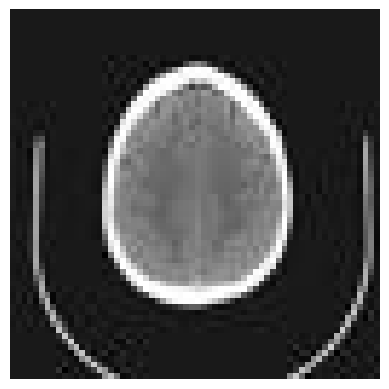

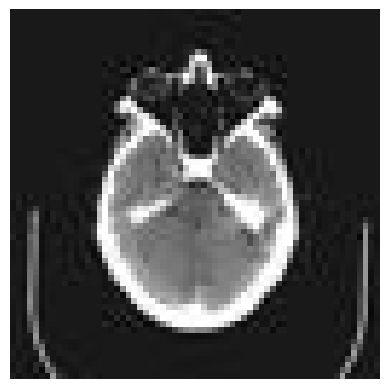

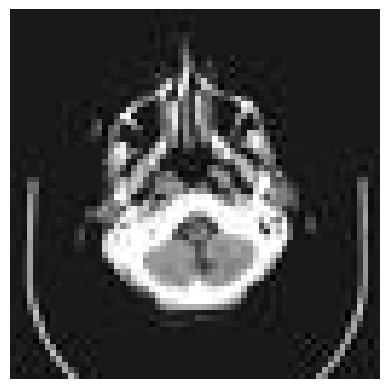

In [19]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path to the dataset root directory
path = "/kaggle/input"

# Collect file paths and labels
file_paths = []
file_labels = []

for root, dirs, files in os.walk(path):
    p = os.path.basename(root)
    for file in files:
        file_paths.append(os.path.join(root, file))
        file_labels.append(p)

# Display the first few "HeadCT" images
num_images_to_display = 5  # Set the number of images to display
count = 0

for path, label in zip(file_paths, file_labels):
    if label == "HeadCT":
        img = Image.open(path)
        plt.figure()
        plt.imshow(img, cmap="gray")
        plt.axis("off")
        plt.show()
        
        count += 1
        if count >= num_images_to_display:
            break



In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

# Load and preprocess data
data_path = "/kaggle/input"
image_paths = []
labels = []

for root, dirs, files in os.walk(data_path):
    p = os.path.basename(root)
    for file in files:
        image_paths.append(os.path.join(root, file))
        labels.append(p)
        
# Split the data into training and testing sets
train_image_paths, test_image_paths, train_labels, test_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state=42
)

# Preprocess images for RF
def preprocess_image_rf(image):
    resized_image = image.resize((64, 64))
    gray_image = resized_image.convert("L")
    image_array = np.array(gray_image)
    normalized_image = image_array / 255.0
    return normalized_image

# Preprocess images for GAN
def preprocess_image_gan(image):
    resized_image = image.resize((128, 128))  # Resize for GAN
    normalized_image = np.array(resized_image) / 127.5 - 1.0  # Normalize to -1 to 1 range
    return normalized_image

# Process and split images for RF
train_images_rf = []
test_images_rf = []

for image_path in train_image_paths:
    image = Image.open(image_path)
    processed_image_rf = preprocess_image_rf(image)
    train_images_rf.append(processed_image_rf)

for image_path in test_image_paths:
    image = Image.open(image_path)
    processed_image_rf = preprocess_image_rf(image)
    test_images_rf.append(processed_image_rf)

train_images_rf = np.array(train_images_rf)
test_images_rf_flattened = test_images_rf.reshape(test_images_rf.shape[0], -1)

# Convert to numpy arrays
train_images_rf = np.array(train_images_rf)
test_images_rf = np.array(test_images_rf)
train_images_gan = np.array(train_images_gan)
test_images_gan = np.array(test_images_gan)

# Flatten the images for RF feature extraction
train_images_rf_flattened = train_images_rf.reshape(train_images_rf.shape[0], -1)
test_images_rf_flattened = test_images_rf.reshape(test_images_rf.shape[0], -1)

# Print some statistics
print("Number of training images (RF):", len(train_images_rf))
print("Number of testing images (RF):", len(test_images_rf))
print("Number of training images (GAN):", len(train_images_gan))
print("Number of testing images (GAN):", len(test_images_gan))
print("Image shape (RF):", train_images_rf[0].shape)
print("Image shape (GAN):", train_images_gan[0].shape)

# Now you have preprocessed train_images_rf, test_images_rf, train_images_gan, test_images_gan, train_labels, and test_labels




/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


AttributeError: 'list' object has no attribute 'reshape'

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train RF model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train_images_rf_flattened, train_labels)

# Evaluate RF model
rf_predictions = rf_model.predict(test_images_rf_flattened)
rf_accuracy = accuracy_score(test_labels, rf_predictions)
print("RF Accuracy:", rf_accuracy)


RF Accuracy: 0.9988974641675854


In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten

# Define GAN architecture
generator = Sequential([
    Dense(256, activation='relu', input_dim=train_images_gan.shape[1]),
    Dense(512, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(128 * 128 * 1, activation='tanh')  # Adjust this layer to match the output shape
])

discriminator = Sequential([
    Flatten(input_shape=(128, 128, 1)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile discriminator
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Compile GAN
gan_input = tf.keras.layers.Input(shape=(train_images_gan.shape[1],))
generated_image = generator(gan_input)
reshaped_image = Reshape((128, 128, 1))(generated_image)
gan_output = discriminator(reshaped_image)
gan = tf.keras.models.Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')




In [39]:
# GAN Training
epochs = 5
batch_size = 64

image_shape = (128, 128, 1)

for epoch in range(epochs):
    for _ in range(train_images_gan.shape[0] // batch_size):
        noise = np.random.normal(0, 1, (batch_size, train_images_gan.shape[1]))
        generated_images = generator.predict(noise)
        generated_images = generated_images.reshape((-1,) + image_shape)  # Reshape to match discriminator input shape
        
        real_images = train_images_gan[np.random.randint(0, train_images_gan.shape[0], batch_size)]
        real_images = real_images.reshape((-1,) + image_shape)  # Reshape real images
        
        combined_images = np.concatenate([generated_images, real_images])
        combined_labels = np.concatenate([np.zeros((batch_size, 1)), np.ones((batch_size, 1))])
        
        d_loss = discriminator.train_on_batch(combined_images, combined_labels)
        
        noise = np.random.normal(0, 1, (batch_size, train_images_gan.shape[1]))
        misleading_targets = np.ones((batch_size, 1))
        
        a_loss = gan.train_on_batch(noise, misleading_targets)
        
    print(f"Epoch {epoch+1}, D Loss: {d_loss[0]}, G Loss: {a_loss}")



2/2 [==============================] - 0s 21ms/step
Epoch 1, D Loss: 4.464630603790283, G Loss: 0.030726388096809387
2/2 [==============================] - 0s 23ms/step
Epoch 2, D Loss: 3.683230400085449, G Loss: 0.033608291298151016
2/2 [==============================] - 0s 22ms/step
Epoch 3, D Loss: 5.099021911621094, G Loss: 0.012820581905543804
2/2 [==============================] - 0s 21ms/step
Epoch 4, D Loss: 6.208535194396973, G Loss: 0.012954281643033028
2/2 [==============================] - 0s 28ms/step
Epoch 5, D Loss: 11.012510299682617, G Loss: 0.23577189445495605


1/1 [==============================] - 0s 94ms/step


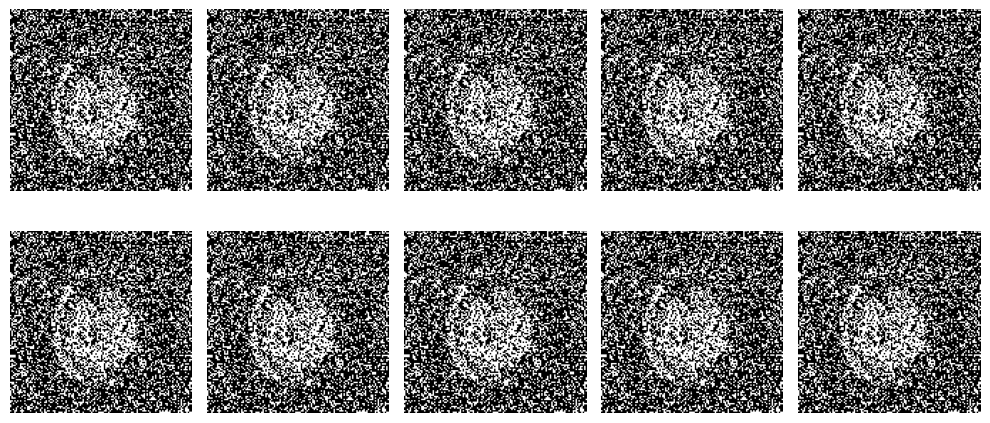

In [40]:
import matplotlib.pyplot as plt

# Generate synthetic images using the trained generator
num_samples = 10  # Number of synthetic images to generate
noise = np.random.normal(0, 1, (num_samples, train_images_gan.shape[1]))
generated_images = generator.predict(noise)
generated_images = generated_images.reshape((-1,) + image_shape)

# Visualize generated images
plt.figure(figsize=(10, 5))
for i in range(num_samples):
    plt.subplot(2, num_samples // 2, i + 1)
    plt.imshow(generated_images[i, :, :, 0], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [52]:
from sklearn.ensemble import RandomForestClassifier

# Select a subset of real images to match the number of generated images
subset_real_images = real_images[:num_samples]

# Create labels for real and generated images
real_labels_rf = np.ones((subset_real_images.shape[0],))
generated_labels_rf = np.zeros((generated_images.shape[0],))

# Combine real and generated images and their corresponding labels
combined_images_rf = np.vstack([subset_real_images, generated_images])
combined_labels_rf = np.hstack([real_labels_rf, generated_labels_rf])


# Flatten images for RF model
flat_combined_images_rf = combined_images_rf.reshape((-1, image_shape[0] * image_shape[1]))

# Split data into train and test sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    flat_combined_images_rf, combined_labels_rf, test_size=0.2, random_state=42
)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train_images_rf_flattened, train_labels)

# Evaluate RF model
rf_predictions = rf_model.predict(test_images_rf_flattened)



In [53]:
from sklearn.metrics import classification_report, confusion_matrix

# Calculate additional evaluation metrics
accuracy_rf = accuracy_score(test_labels, rf_predictions)
print("RF Accuracy:", accuracy_rf)

# Calculate and display more evaluation metrics
print("Random Forest Classification Report:")
print(classification_report(test_labels, rf_predictions))

# Confusion matrix
conf_matrix = confusion_matrix(test_labels, rf_predictions)
print("Confusion Matrix:")
print(conf_matrix)



RF Accuracy: 0.9988974641675854
Random Forest Classification Report:
              precision    recall  f1-score   support

   AbdomenCT       1.00      1.00      1.00      2045
   BreastMRI       1.00      1.00      1.00      1751
         CXR       1.00      0.99      1.00      1989
     ChestCT       1.00      1.00      1.00      2020
        Hand       0.99      1.00      1.00      1963
      HeadCT       1.00      1.00      1.00      2023

    accuracy                           1.00     11791
   macro avg       1.00      1.00      1.00     11791
weighted avg       1.00      1.00      1.00     11791

Confusion Matrix:
[[2045    0    0    0    0    0]
 [   0 1751    0    0    0    0]
 [   0    0 1979    0   10    0]
 [   0    0    0 2020    0    0]
 [   0    0    3    0 1960    0]
 [   0    0    0    0    0 2023]]


In [55]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

# Make predictions using the trained RF model
y_pred_rf = rf_model.predict(X_test_rf)

# Calculate predicted probabilities for the positive class ('tumor')
y_pred_rf_proba = rf_model.predict_proba(X_test_rf)[:, 1]

# Calculate ROC curve using predicted probabilities
fpr_rf, tpr_rf, _ = roc_curve(y_test_rf, y_pred_rf_proba)

# Calculate precision-recall curve using predicted probabilities
precision_rf, recall_rf, _ = precision_recall_curve(y_test_rf, y_pred_rf_proba)

# Calculate AUC-ROC for Random Forest model
roc_auc_rf = auc(fpr_rf, tpr_rf)
print(f"Random Forest AUC-ROC: {roc_auc_rf:.2f}")

# Calculate AUC-PR for Random Forest model
pr_auc_rf = auc(recall_rf, precision_rf)
print(f"Random Forest AUC-PR: {pr_auc_rf:.2f}")

# Display additional metrics
print("\nAdditional Metrics:")
print(f"Random Forest Sensitivity: {recall_rf[1]:.2f}")
print(f"Random Forest Specificity: {recall_rf[0]:.2f}")
print(f"Random Forest Negative Predictive Value: {precision_rf[0]:.2f}")

# Generate a classification report and confusion matrix
print("\nRandom Forest Classification Report:")
print(classification_report(y_test_rf, y_pred_rf))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test_rf, y_pred_rf)
print(conf_matrix)







ValueError: X has 16384 features, but RandomForestClassifier is expecting 4096 features as input.